# These Algorithm is depends on many factors other than learning rate 

## Popular Algorithm
    - Momentum
    - NAG
    - AdaGrad
    - AdaDelta
    - RMSprop
    - Adam

<!-- # Momentum -->
$ \huge{\color{orange}{\text{MOMENTUM}}} $
#### From physics concepts : moving with inertia
#### หากใส่โมเมนตัมเข้าไป เวลาคำนวนตำแหน่งต่อไปจะมีผลจากการเคลื่อนไหวในขั้นก่อนหน้านี้มาเกี่ยวด้วย โดยจะพยายามรักษาทิศการเคลื่อนที่ในแนวเดิม

#### SGD (old fashion algorithm) new weight depends on **learning rate**, **slope of oldweigth** 
## $$\Delta \vec{w}_{t+1} =  - \eta \vec{g}(\vec{w}_t) \tag{1}$$

## $\vec{g}$ is slope of **loss function J at position $w_t$**
## $$ \vec{g}(\vec{w}_t) = \vec{\nabla}J(\vec{w}_t) = \dfrac{\partial J(\vec{w}_t)}{\partial \vec{w}_t} 
$$

## Change of weigth
## $$
\vec{w}_{t+1} = \vec{w}_t + \Delta \vec{w}_{t+1}
$$

# Add Momentum to (1)
## $$
\Delta \vec{w}_{t+1} = \color{red}{\alpha \Delta \vec{w}_t} -  \eta \vec{g}(\vec{w}_t)
$$
#### $ \alpha $ = magnitude of momentum = 0.9 (usually use)
if this term is adsents then it's just normal gradient descendant

# $\color{red}{Suppose}$ **Loss function** depends on these 2 variables
## $$
J(w_{1,t},w_{2,t}) = 0.5w_{1,t}^2+20w_{2,t}^2-5w_1+10w_2-7
$$
## Derivatives 
## $$
g_1(w_{1,t},w_{2,t}) = \frac{\partial J(w_{1,t},w_{2,t})}{\partial w_{1.t}} = w_{1,t}-5
$$
## $$
g_2(w_{1,t},w_{2,t}) = \frac{\partial J(w_{1,t},w_{2,t})}{\partial w_{2,t}} = 40w_{2,t}+10
$$

In [5]:
def J(w1,w2):
    return 0.5*w1**2 + 20*w2**2 - 5*w1 + 10*w2 - 7
def dJ(w1,w2):
    return w1 - 5, 40*w2 + 10

# Take a look we will see Min-points $\approx$ (5, -0.25)
### Try use (-7, 2) as init-points with normal SGD

In [6]:
def sgd(w1, w2, n, eta=.01):
    w1_, w2_ = [w1], [w2]
    for i in range(n):
        gw1, gw2 = dJ(w1, w2)
        dw1 = -eta * gw1
        dw2 = -eta * gw2
        
        w1 = w1 + dw1
        w2 = w2 + dw2
        w1_.append(w1)
        w2_.append(w2)
    return w1_, w2_

w1, w2 = -7., 2.
w1_, w2_ = sgd(w1, w2, n=50, eta=0.04)


        

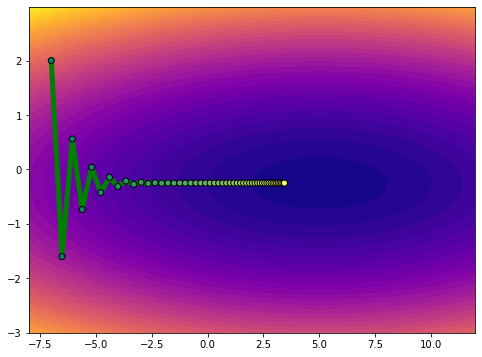

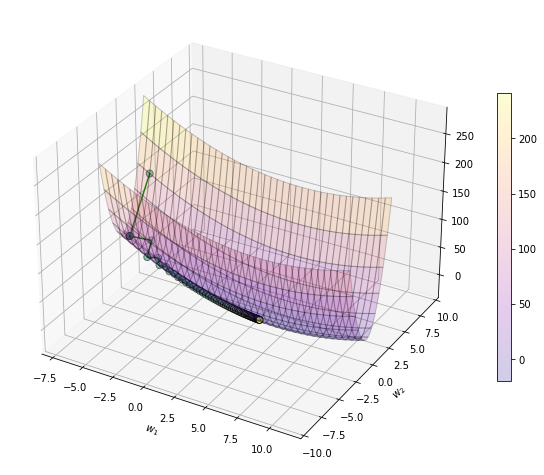

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def plot(x, y):
    z = J(x, y)
    mx, my = np.meshgrid(np.arange(-8, 12, .01),
                        np.arange(-3, 3, .01))
    mz = J(mx, my)
    
    plt.figure(figsize=(8,6))
    plt.plot(x, y, 'g', lw=5)
    cm1, cm2 = plt.cm.summer, plt.cm.plasma
    plt.scatter(x, y, c=np.linspace(0, 1, len(x)), cmap=cm1,
               edgecolor='k', zorder=2)
    plt.contourf(mx, my, mz, 40, cmap=cm2)
    
    plt.figure(figsize=(8,8))
    ax = plt.axes([0,0,1,1], projection='3d', 
                 xlabel='$w_1$', ylabel='$w_2$', xlim=(-8, 12), 
                 ylim=(-10, 10))
    ax.plot(x, y, z, c='g')
    ax.scatter(x, y, z, s=50, c=np.linspace(0, 1, len(x)), cmap=cm1,
               edgecolor='k', )
    ps = ax.plot_surface(mx, my, mz, rstride=50, cstride=50,
                 alpha=.2, cmap=cm2,
                edgecolor='k')
    
    
    plt.colorbar(mappable=ps, ax=ax, shrink=.5)
    plt.show()
    

plot(np.array(w1_),
    np.array(w2_))
    

# Add Momentum to it

In [8]:
def mmtsgd(w1, w2, n, eta=.01, mmt=0.9):
    dw1, dw2 = 0, 0
    w1_, w2_ = [w1], [w2]
    for i in range(n):
        gw1, gw2 = dJ(w1, w2)
        dw1 = mmt * dw1 -eta * gw1
        dw2 = mmt * dw2 -eta * gw2
        
        w1 = w1 + dw1
        w2 = w2 + dw2
        w1_.append(w1)
        w2_.append(w2)
    return w1_, w2_

w1, w2 = -7., 2.
w1_, w2_ = mmtsgd(w1, w2, n=100, eta=0.04, )

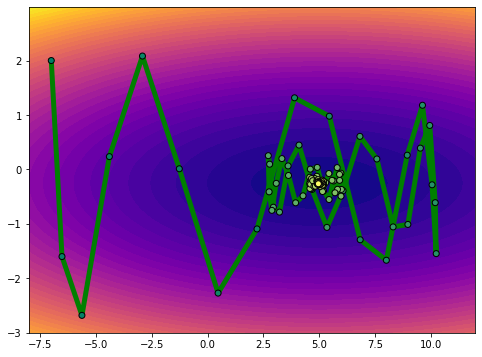

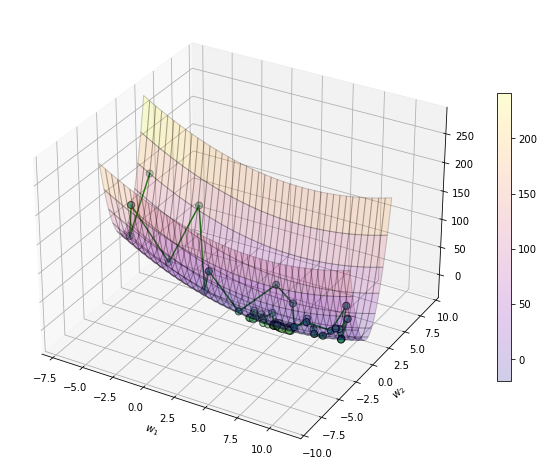

In [9]:
plot(np.array(w1_), np.array(w2_))

### We usually adjust **learning rate** down in mmtsgd

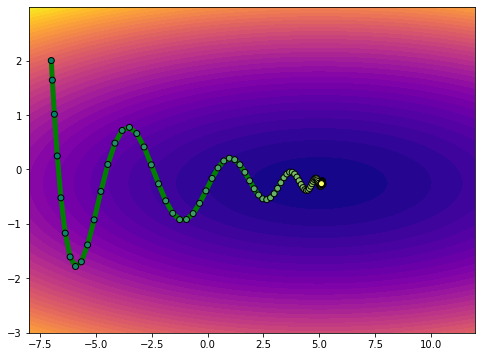

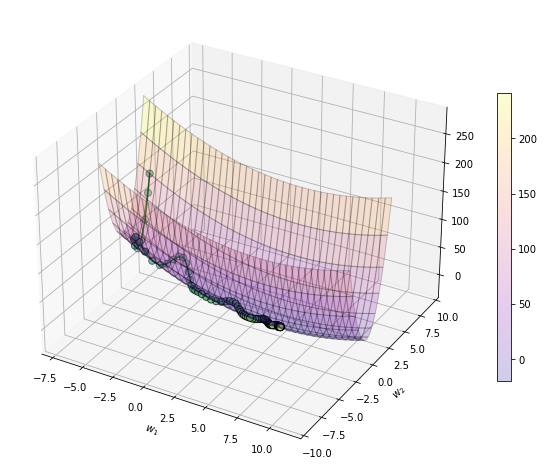

In [10]:
w1, w2 = -7., 2.
w1_, w2_ = mmtsgd(w1, w2, n=100, eta=0.004)

plot(np.array(w1_), np.array(w2_))

# Refactor to Accept multi variable $w_1, w_2, w_3, \dots$

In [11]:
# ส่วนฟังก์ชันให้รับตัวแปรเป็นอาเรย์เดียวที่รวมค่าทั้งหมดที่ต้องการคำนวณรวดเดียว การคำนวณใช้ด็อตเป็นหลัก
def J(w):
    return -7+w.dot(np.array([-5,10]))+(w**2).dot(np.array([0.5,20]))
def dJ(w):
    return np.array([-5,10])+w.dot(np.array([[1,0],[0,40]]))

In [12]:
def sgd(w, n, eta=0.01):
    w_ = [w]
    for i in range(n):
        w = w - eta* dJ(w)
        w_.append(w)
    return np.stack(w_)

def mmtsgd(w, n, eta=.01, mmt=.9):
    dw = w * 0
    w_ = [w]
    for i in range(n):
        gw = dJ(w)
        dw = mmt*dw - eta*gw
        # w += dw # ERROR
        w = w + dw
        w_.append(w)
    return np.stack(w_)


In [13]:
def plot(X):
    z = J(X)
    mX = np.stack(arrays=np.meshgrid(
        np.arange(-8, 12, .01),
        np.arange(-3, 3, .01), 
    ), axis=2 )
    mz = J(mX)
    
    cm1, cm2 = plt.cm.summer, plt.cm.plasma
    
    plt.figure(figsize=(8,4))
    plt.axes(aspect=1)
    x, y = X[:,0], X[:,1]
    plt.plot(x, y, 'g')
    plt.scatter(x, y, c=np.linspace(0, 1, len(X)), cmap=cm1,
               edgecolor='k', zorder=2)
    plt.contourf(mX[:,:,0], mX[:,:,1], mz, 40, cmap=cm2)
    
    
    plt.figure(figsize=(8,8))
    ax = plt.axes([0,0,1,1], projection='3d', 
                 xlabel='$w_1$', ylabel='$w_2$', xlim=(-8, 12), 
                 ylim=(-10, 10))
    ax.plot(x, y, z, c='g')
    ax.scatter(x, y, z, s=50, c=np.linspace(0, 1, len(X)), cmap=cm1,
               edgecolor='k', )
    ps = ax.plot_surface(mX[:,:,0], mX[:,:,1], mz, rstride=50, cstride=50,
                 alpha=.2, cmap=cm2,
                edgecolor='k')
    
    
    plt.colorbar(mappable=ps, ax=ax, shrink=.5)
    plt.show()
    

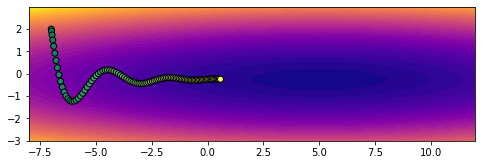

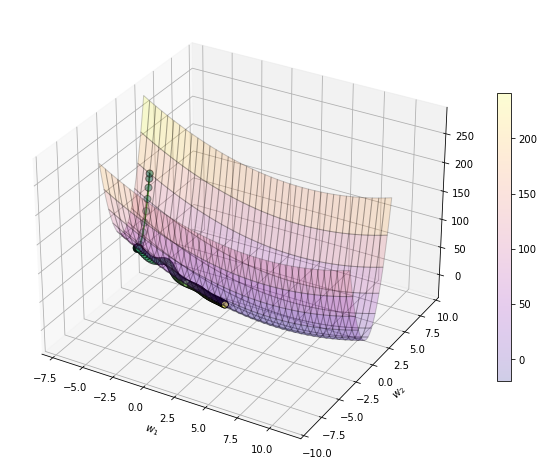

In [14]:
w = np.array([-7., 2.])
w_ = mmtsgd(w, n=100, eta=0.001)
plot(w_)

In [15]:
# len(np.meshgrid(np.arange(-8,12,0.01),np.arange(-3,3,0.01)))
# np.meshgrid(np.arange(-8,12,0.01),np.arange(-3,3,0.01))
np.stack(np.meshgrid(np.arange(-8,12,0.01),np.arange(-3,3,0.01)),2).shape

(600, 2000, 2)

$ \huge{\color{orange}{\text{NESTEROV MOMENTUM  or  NAG}}} $
#### ความชันแบบเร่งของเนสเตรอฟ (Nesterov Accelerated Gradient) ย่อว่า NAG
 ในเมื่อรู้ว่ากำลังจะเคลื่อนที่ไปทางไหนอยู่ แบบนั้นค่าความชันที่จะเอามาคูณกับอัตราการเรียนรู้ก็ควรจะเปลี่ยนมาใช้เป็นความชันของบริเวณที่กำลังมุ่งหน้าไปด้วย
 
# $$
\Delta \vec{w}_{t+1} = \alpha \Delta \vec{w}_t-\eta\vec{g}(\vec{w}_t + \color{red}{\alpha \Delta \vec{w}_t})
$$


## $\text{ g⃗ ในที่นี้ไม่ใช่ความชันของตำแหน่ง w ที่อยู่ แต่เป็น } \\ 
\color{purple}{\text{ตำแหน่งที่จะมุ่งไปหากเคลื่อนไปต่อตามผลของโมเมนตัม}}$


In [16]:
def nag(w, n, eta=.01, mmt=.9):
    dw = w * 0
    w_ = [w]
    for i in range(n):
        g_ = dJ(w + mnt*dw)
        dw = mmt*dw - eta*g_
        # w += dw # ERROR
        w = w + dw
        w_.append(w)
    return np.stack(w_)

## Better Calculation
# $$
\begin{eqnarray}
\vec{g}(\vec{w}_t+\alpha \Delta \vec{w}_t)
&=& \dfrac{\partial J(\vec{w}_t)}{\partial \vec{w}_t} + \dfrac{\partial J(\alpha \Delta \vec{w}_t)}{\partial \vec{w}_t}\\
&=& \vec{g}(\vec{w}_t)+\alpha\dfrac{\partial J( \vec{w}_t-\vec{w}_{t-1})}{\partial \vec{w}_t}\\
&=& \vec{g}(\vec{w}_t) + \alpha (\vec{g}(\vec{w}_t)-\vec{g}(\vec{w}_{t-1}))
\end{eqnarray}
$$

#### ได้สูตรคำนวณเป็นแบบนี้ออกมา คือใช้ความชันของตำแหน่งที่ผ่านมาแล้ว ไม่ต้องไปหาความชันในตำแหน่งใหม่ที่ยังไม่เคยไปถึงมาก่อนแล้ว
# $$
\Delta \vec{w}_{t+1} = \alpha \Delta \vec{w}_t - \color{green}{ \eta(\vec{g}(\vec{w}_t)+\alpha (\vec{g}(\vec{w}_t)-\vec{g}(\vec{w}_{t-1})))}
$$

### Let $gw_0$ = previous position

In [17]:
def nag(w, n, eta=.01, mmt=.9):
    dw = w * 0
    gw0 = dJ(w)
    w_ = [w]
    for i in range(n):
        # g_ = dJ(w + mnt*dw)
        gw = dJ(w) # current gw
        # dw = mmt*dw - eta*g_
        dw = mmt*dw - eta*(gw + mmt*(gw - gw0))
        # w += dw # ERROR
        w = w + dw
        gw0 = gw
        w_.append(w)
        
    return np.stack(w_)

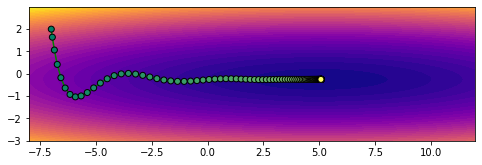

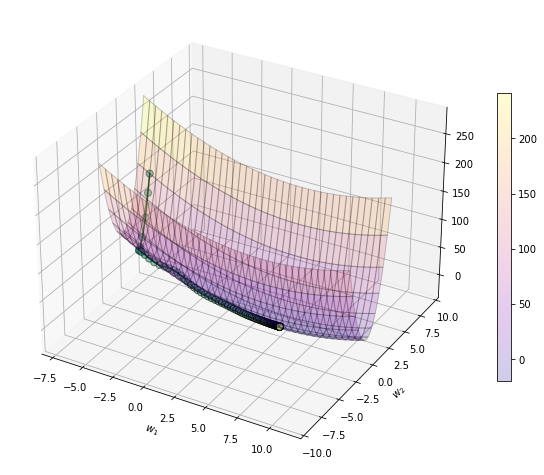

In [18]:
ng = nag(np.array([-7., 2.]), n=100, eta=.004)
plot(ng)

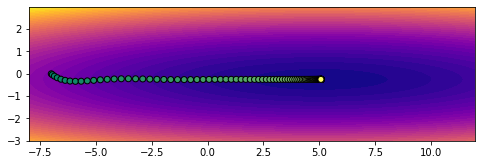

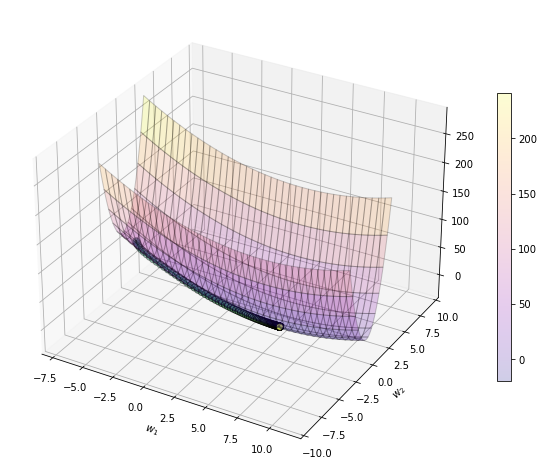

In [19]:
ng = nag(np.array([-7., 0]), n=100, eta=.004)
plot(ng)

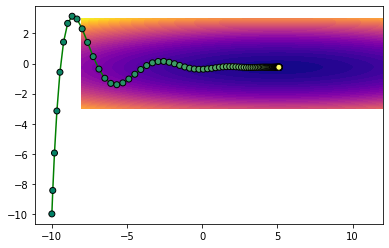

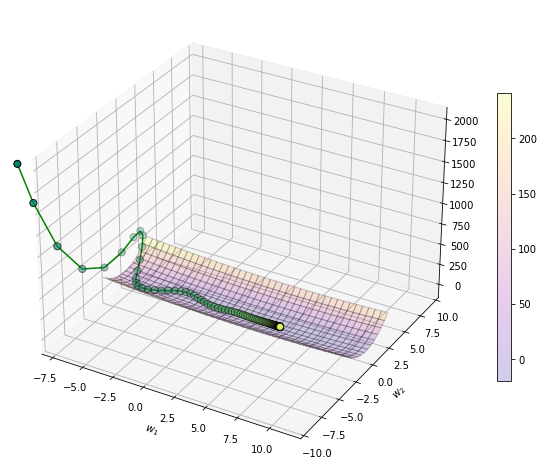

In [20]:
ng = nag(np.array([-10,-10]), n=100, eta=.004)
plot(ng)

### $ \huge{\color{orange}{\text{AdaGrad}}} $
## $\text{นอกจากการเพิ่มพจน์โมเมนตัมเข้าไปแล้ว อีกทางเลือกหนึ่งก็คือ } \\
\color{green}{\text{การปรับในส่วนพจน์ของอัตราการเรียนรู้ให้เปลี่ยนแปลงลดลงตามเวลา}}
$
#### Adaptive Gradient


# $$ \Delta \vec{w}_{t+1} = - \frac{\eta}{\color{red}{\sqrt{\vec{G}_t}}} \vec{g}_t $$ 
# $
\begin{align}
\vec{G}_t &= \sum_{s=0}^t \vec{g}(\vec{w}_s)^2  \\
& = \text{ผลรวมกำลังสองของความชันทั้งหมดสะสมตั้งแต่เริ่มการเรียนรู้}
\end{align}
$

In [21]:
def adagrad(w, n, eta=.01):
    G = 1e-7
    w_ = [w]
    for i in range(n):
        gw = dJ(w)
        G += gw**2
        dw = -eta * gw / np.sqrt(G)
        w = w + dw
        w_.append(w)
    return np.stack(w_)

#### 1e-7 ที่ใส่เข้ามาใน G ตั้งแต่เริ่มต้นนี้เป็นแค่ค่าเล็กๆที่ใส่เข้าไปเพื่อกันกรณีที่ความชันเริ่มต้นเป็น 0 ซึ่งจะทำให้ตัวหารเป็น 0 และเกิดข้อผิดพลาดขึ้น
## โดยปกติเวลาใช้วิธีนี้ค่าอัตราการเรียนรู้ eta ควรจะมากเมื่อเทียบกับวิธีอื่น เพราะจะลดลงอย่างรวดเร็ว


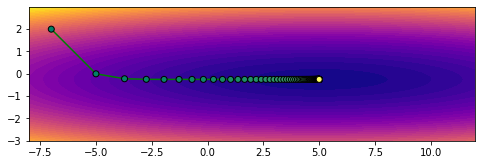

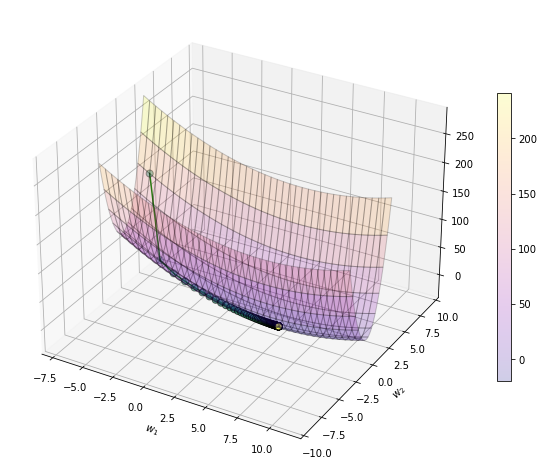

In [22]:
plot(adagrad(np.array([-7.,2.]),n=100,eta=2))

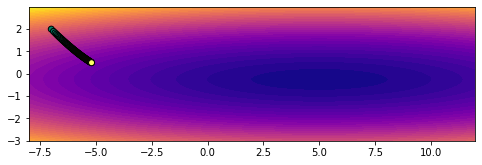

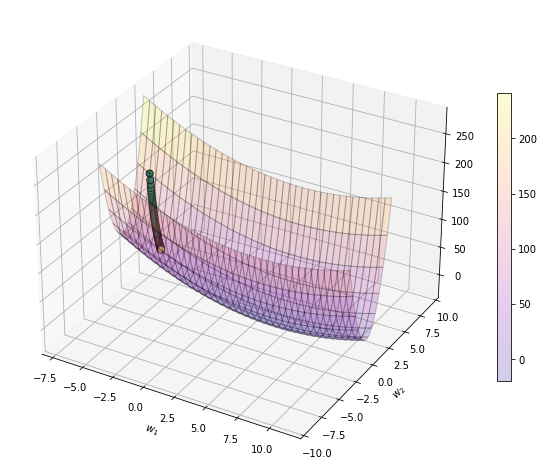

In [23]:
plot(adagrad(np.array([-7.,2.]),n=100,eta=.1))

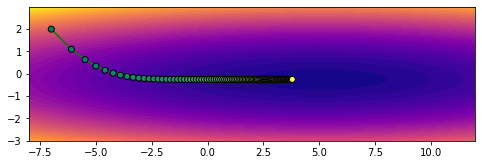

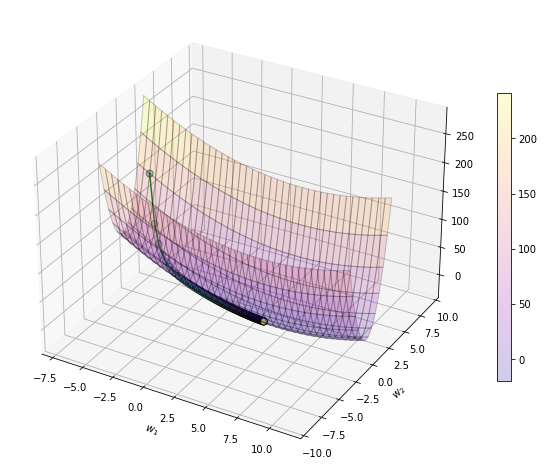

In [24]:
plot(adagrad(np.array([-7.,2.]),n=100,eta=.9))

#### $ \huge{\color{orange}{\text{AdaDelta}}} $
## วิธี AdaGrad มีข้อเสียตรงที่ว่ายิ่งเรียนรู้ไปเรื่อยๆเวลาผ่านไปอัตราการรู้จะยิ่งลดลงเพราะว่าค่า G ซึ่งเป็นตัวหารนั้นบวกเพิ่มขึ้นเรื่อยๆไม่มีลด ดังนั้นทำให้ช่วงหลังๆการเรียนรู้แทบจะหยุดนิ่ง
# ดัดแปลงค่า G นิดหน่อย 
# $$ \vec{G}_t = \color{red}{\rho\vec{G}_{t-1}+(1-\rho)\vec{g}(\vec{w}_t)^2} $$
 ρ เป็นพารามิเตอร์อีกตัวที่ต้องกำหนด มีค่าระหว่าง 0 ถึง 1

In [25]:
def adaDelta(w, n, eta=1., rho=.95):
    G = 1e-7
    w_ = [w]
    for i in range(n):
        gw = dJ(w)
        G = rho*G + (1-rho)*gw**2
        dw = -eta * gw / np.sqrt(G)
        w = w + dw
        w_.append(w)
    return np.stack(w_)

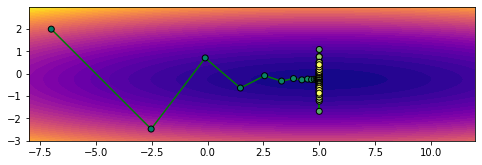

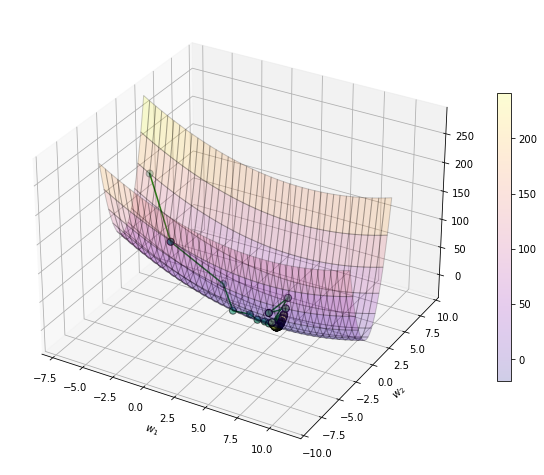

In [26]:
plot(adaDelta(np.array([-7., 2.]), n=100, eta=1))

#### $ \huge{\color{orange}{\text{RMSprop}}} $
### วิธีนี้คล้ายกับ Adadelta คือปรับปรุงจาก AdaGrad เป็นวิธีที่คิดขึ้นโดยอาจารย์ที่สอนในบทเรียนออนไลน์เว็บ coursera


#### $ \huge{\color{orange}{\text{Adam}}} $
### เป็นอีกวิธีที่ปรับปรุงมาจาก AdaGrad โดยนำเอาหลักของโมเมนตัมมารวมอยู่ในนั้นด้วย ชื่อย่อมาจาก Adaptive Moment
# $$ \Delta \vec{w}_{t+1} = -\eta \color{red}{\frac{\sqrt{1-\beta_2^i}}{1-\beta_1^i}\frac{\vec{m}_t}{\sqrt{\vec{v}_t}}}$$
## $ \vec{m}_t = \beta_1\vec{m}_{t-1}+(1-\beta_1)\vec{g}(w_t) $
## $ \vec{v}_t = \beta_2\vec{v}_{t-1}+(1-\beta_2)\vec{g}(w_t)^2 $


### มีไฮเพอร์พารามิเตอร์ที่ต้องกำหนดเพิ่มนอกจาก η ก็คือ β1 และ β2 ปกติแล้วจะให้ β1=0.9 และ β2=0.999


In [27]:
def adam(w, n, eta=.001, beta1=.9, beta2=.999):
    m = w * 0
    v = m + 1e-7
    w_ = [w]
    
    for i in range(1, n+1):
        gw = dJ(w)
        m = beta1*m + (1-beta1)*gw
        v = beta2*v + (1-beta2)*gw**2
        dw = -eta * np.sqrt(1-beta2**i) / (1-beta1**i) * m /np.sqrt(v)
        w = w + dw
        w_.append(w)
    return np.stack(w_)

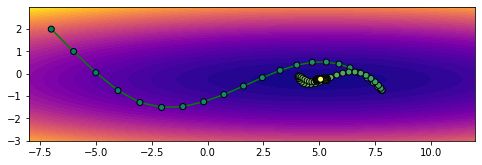

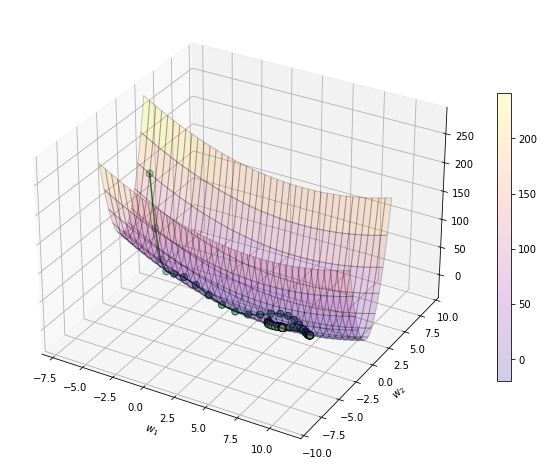

In [28]:
plot(adam(np.array([-7., 2.]), n=100, eta=1))

![Compare](https://phyblas.hinaboshi.com/rup/nayuki/2017/e15.gif)

## ส่วนภาพนี้เปรียบเทียบสถานการณ์ที่เจอพื้นรูปอานม้า
![saddle](https://phyblas.hinaboshi.com/rup/nayuki/2017/e16.gif)

## แต่ทั้งนี้ประสิทธิภาพของแต่ละวิธีก็ขึ้นอยู่กับไฮเพอร์พารามิเตอร์ต่างๆซึ่งต้องเลือกใช้ให้เหมาะสมด้วย


# วิธีการในการต่างๆที่ใช้เป็นเครื่องมือในการเคลื่อนลงตามความชันแบบต่างๆเหล่านี้ถูกเรียกว่าออปทิไมเซอร์ (optimizer) แปลว่าเครื่องมือที่จะปรับให้อะไรบางอย่างออกมาดีหรือเหมาะที่สุด

In [29]:
class Sgd:
    def __init__(self,eta=0.01):
        self.eta = eta

    def __call__(self,w,g):
        w += -self.eta*g

class Mmtsgd:
    def __init__(self,eta=0.01,mmt=0.9):
        self.eta = eta
        self.mmt = mmt
        self.dw = 0

    def __call__(self,w,gw):
        self.dw = self.mmt*self.dw-self.eta*gw
        w += self.dw

class Nag:
    def __init__(self,eta=0.01,mmt=0.9):
        self.eta = eta
        self.mmt = mmt
        self.dw = 0
        self.gw0 = np.nan

    def __call__(self,w,gw):
        if(self.gw0 is np.nan):
            self.gw0 = gw
        self.dw = self.mmt*self.dw-self.eta*(gw+self.mmt*(gw-self.gw0))
        self.gw0 = gw
        w += self.dw

### Method \__call__ is shorthand of instance.\__call__()
#### You can briefly call instance() insteads of instance.\__call__()
อนึ่ง ในส่วนบรรทัดสุดท้ายที่ปรับค่า w นั้นจำเป็นต้องใช้เป็น w += self.dw ไม่ใช่ w = w+ self.dw ดูเผินๆจะคิดว่าเหมือนกัน แต่หากใช้อย่างหลัง w จะกลายเป็นสร้างอาเรย์ใหม่ขึ้นแต่อาเรย์เดิมจะไม่มีการปรับค่า ตรงนี้เป็นเกร็ดเล็กน้อย เป็นเรื่องปลีกย่อยสำหรับพฤติกรรมของ ndarray


In [36]:
w = np.array([-7., 2.])
opt = Nag(eta=.004)

w_ = [w.copy()]
for i in range(100):
    gw = dJ(w)
    opt(w, gw) # opt.__call__(w, gw)
    # opt.__call__(w, gw)
    w_.append(w.copy())
w_ = np.stack(w_)

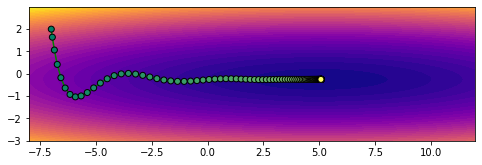

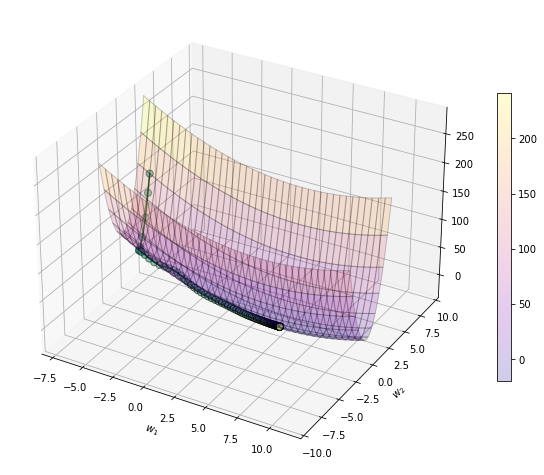

In [37]:
plot(w_)

# Ada-Family

In [38]:
class Adagrad:
    def __init__(self,eta=0.01):
        self.eta = eta
        self.G = 1e-7

    def __call__(self,w,gw):
        self.G += gw**2
        w += -self.eta*gw/np.sqrt(self.G)

class Adadelta:
    def __init__(self,eta=0.01,rho=0.95):
        self.eta = eta
        self.rho = rho
        self.G = 1e-7

    def __call__(self,w,gw):
        self.G = self.rho*self.G+(1-self.rho)*gw**2
        w += -self.eta*gw/np.sqrt(self.G)

class Adam:
    def __init__(self,eta=0.001,beta1=0.9,beta2=0.999):
        self.eta = eta
        self.beta1 = beta1
        self.beta2 = beta2
        self.i = 1
        self.m = 0
        self.v = 1e-7

    def __call__(self,w,gw):
        self.m = self.beta1*self.m+(1-self.beta1)*gw
        self.v = self.beta2*self.v+(1-self.beta2)*gw**2
        w += -self.eta*np.sqrt(1-self.beta2**self.i)/(1-self.beta1**self.i)*self.m/np.sqrt(self.v)
        self.i += 1

In [52]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

class ThotthoiLogistic:
    def __init__(self,opt):
        self.opt = opt # เก็บ optimizer แทนที่จะเก็บอัตราการเรียนรู้ (η)

    def rianru(self,X,z,n_thamsam,n_batch=0):
        n = len(z)
        if(n_batch==0 or n<n_batch):
            n_batch = n
        X_std = X.std(axis=0)
        # X_std = X.std()
        X_std[X_std==0] = 1
        X_mean = X.mean()
        X = (X-X_mean)/X_std
        self.w = np.zeros(X.shape[1]+1)
        gw = self.w*0
        self.entropy = []
        self.thuktong = []
        for j in range(n_thamsam):
            lueak = np.random.permutation(n)
            for i in range(0,n,n_batch):
                Xn = X[lueak[i:i+n_batch]]
                zn = z[lueak[i:i+n_batch]]
                phi = self.ha_sigmoid(Xn)
                eee = (phi-zn)/len(zn)
                gw[1:] = np.dot(eee,Xn)
                gw[0] = eee.sum()
                self.opt(self.w,gw) # ใช้ optimizer เพื่อปรับค่าน้ำหนัก
            thukmai = self.thamnai(X)==z
            self.thuktong += [thukmai.mean()*100]
            self.entropy += [self.ha_entropy(X,z)]

        self.w[1:] /= X_std
        self.w[0] -= (self.w[1:]*X_mean).sum()

    def thamnai(self,X):
        return np.dot(X,self.w[1:])+self.w[0]>0

    def ha_sigmoid(self,X):
        return sigmoid(np.dot(X,self.w[1:])+self.w[0])

    def ha_entropy(self,X,z):
        phi = self.ha_sigmoid(X)
        return -(z*np.log(phi+1e-7)+(1-z)*np.log(1-phi+1e-7)).mean()

# DUMMY DATASETS

In [55]:
from sklearn import datasets
np.random.seed(4)
X, z = datasets.make_blobs(n_samples=12000, n_features=2, centers=2, cluster_std=2, random_state=2)
model = ThotthoiLogistic(Adagrad(eta=1))
model.rianru(X, z, n_thamsam=50, n_batch=150)
# X.std()
# X.std(axis=0)
# X.std(axis=1)


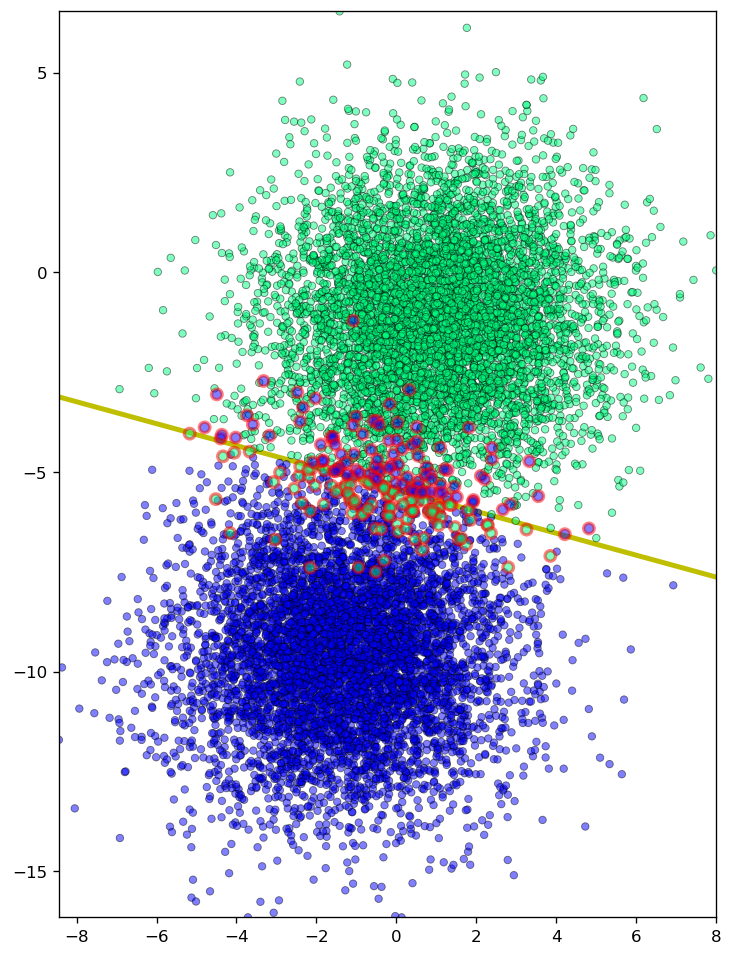

In [69]:
plt.figure(figsize=(10,10), dpi=120)
x_line = np.array([X[:,0].min(), X[:,0].max()])
# y_line = np.array([X[:,1].min(), X[:,1].max()])
y_line = -(model.w[0] + model.w[1]*x_line) / model.w[2]

true_predicts = model.thamnai(X) == z
plt.axes(aspect=1, 
        xlim=(X[:,0].min(), X[:,0].max()), 
        ylim=(X[:,1].min(), X[:,1].max()))
plt.plot(x_line, y_line, 'y', lw=3, zorder=0)
plt.scatter(X[true_predicts, 0], X[true_predicts, 1], 
           c=z[true_predicts], alpha=.5, 
           s=20, edgecolor='k', lw=.5, cmap='winter')
plt.scatter(X[~true_predicts, 0], X[~true_predicts, 1], 
           c=z[~true_predicts], alpha=.5, 
           s=40, edgecolor='r', lw=2, cmap='winter')
plt.show()

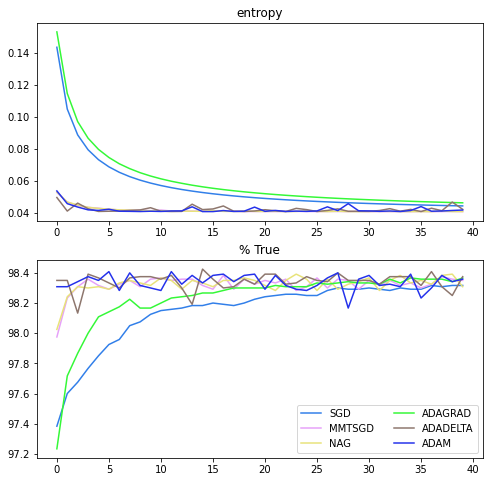

In [74]:
plt.figure(figsize=(8,8))
ax1 = plt.subplot(211)
ax1.set_title('entropy')
ax1.tick_params(labelbottom='off')

ax2 = plt.subplot(212)
ax2.set_title('% True')
opts = [
   Sgd(.2),
    Mmtsgd(.2),
    Nag(.2),
    Adagrad(.2),
    Adadelta(.2),
    Adam(.2)
]

for opt in opts:
    model = ThotthoiLogistic(opt)
    model.rianru(X, z, n_thamsam=40, n_batch=150)
    color = np.random.random(3)
    ax1.plot(model.entropy, color=color)
    ax2.plot(model.thuktong, color=color)
ax2.legend(['SGD', 'MMTSGD', 'NAG', 'ADAGRAD', 'ADADELTA', 'ADAM'], ncol=2)
plt.show()